In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

# STO simulation data part

## Load raw data, denoised data, and truth

In [2]:
path = '/srv/home/chenyu/TensorDenoise/Simulatons/STO_simulation/'
raw_data = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_1000FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']

truth_data = np.load(path + 'Simulation_truth_STO_slice_5_1000FPS_cropped_100layers.npy')

tensor_denoised = sio.loadmat(path + 'Simulation_tensor_STO_slice_5_1000FPS_cropped_100layers.mat')
tensor_denoised = tensor_denoised['est_HOOI']

NLPCA_denoised = sio.loadmat(path + 'Simulation_NLPCA_STO_slice_5_1000FPS_cropped_100layers.mat')
NLPCA_denoised = NLPCA_denoised['est_NLPCA']

BM4D_denoised = sio.loadmat(path + 'Simulation_BM4D_STO_slice_5_1000FPS_cropped_100layers.mat')
BM4D_denoised = BM4D_denoised['est_BM4D']

## Calculate PSNR for three methods under different frame rates

In [ ]:
noisy_file.shape

In [6]:
# Calculate input vs output psnr for tensor, NPLCA, and BM4D
FPS_list = [1000,2000,4000,6000,8000,20000,40000]
PSNR_list = np.zeros((5,len(FPS_list)))
path = '/srv/home/chenyu/TensorDenoise/Simulatons/STO_simulation/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'Simulation_truth_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'Simulation_noisy_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'Simulation_NLPCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'Simulation_BM4D_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PSNR_list[0,i] = averagePSNR(tensor_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(NLPCA_file,truth_file,0)
    PSNR_list[2,i] = averagePSNR(BM4D_file,truth_file,0)
    PSNR_list[3,i] = averagePSNR(noisy_file,truth_file,0)
    PSNR_list[4,i] = averagePSNR(tensor_file_optimized, truth_file, 0)
    
    print(FPS)
    print(averagePSNR(tensor_file,truth_file,0))
    print(averagePSNR(noisy_file,truth_file,0))

1000
38.094242023747945
13.79448768245227
2000
36.19586053174655
10.789466853909442
4000
34.180429084884494
7.779698591289398
6000
32.62600349757679
6.0237242052549345
8000
31.6735111715934
4.781975945526129
20000
27.553229672725493
0.8320264415456028
40000
24.23794666346378
-2.1346704589286714


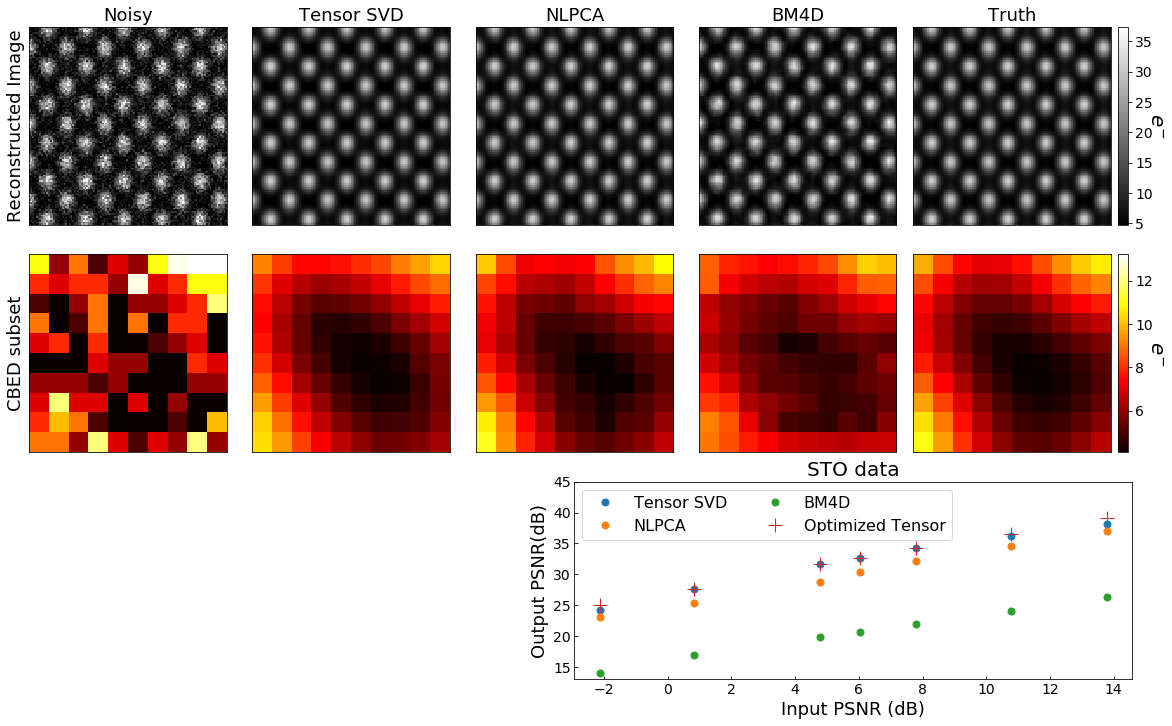

In [7]:
# overall plot
fig = plt.figure(figsize=(20,12))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(351)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
plt.ylabel('Reconstructed Image', fontsize=18)
# ax.text(95,105,'a',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(352)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Tensor SVD',fontsize=18)
# ax.text(95,105,'b',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(353)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('NLPCA',fontsize=18)
# ax.text(95,105,'c',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(354)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('BM4D',fontsize=18)
# ax.text(95,105,'d',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(355)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Truth',fontsize=18)
# ax.text(95,105,'e',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(356)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=18)
# ax.text(8,8,'f',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(357)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'g',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'1.4 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(358)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'h',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'539.1 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(359)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'i',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'249.5 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(3,5,10)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'j',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)

ax3 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'STO data',fontsize=20, color='black')
plt.title('STO data',fontsize=20)
plt.ylim([13,45])

fig.subplots_adjust(wspace = 0.0, hspace = 0.15)
fig.savefig('/srv/home/chenyu/TensorDenoise/Simulatons/STO_simulation/STO_DiffMethods.tif')

# Si dislocation part

## Load raw data, denoised data, and truth

In [10]:
path = '/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/'
raw_data = sio.loadmat(path + 'Simulation_noisy_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']

truth_data = np.load(path + 'Simulation_truth_SiDisl_slice_5_1000FPS_cropped_100layers.npy')

tensor_denoised = sio.loadmat(path + 'Simulation_tensor_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
tensor_denoised = tensor_denoised['est_HOOI']

NLPCA_denoised = sio.loadmat(path + 'Simulation_NLPCA_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
NLPCA_denoised = NLPCA_denoised['est_NLPCA']

BM4D_denoised = sio.loadmat(path + 'Simulation_BM4D_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
BM4D_denoised = BM4D_denoised['est_BM4D']

## Calculate PSNR for different methods under different frame rates

In [11]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
PSNR_list = np.zeros((5,len(FPS_list)))
path = '/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'Simulation_truth_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'Simulation_noisy_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'Simulation_NLPCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'Simulation_BM4D_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PSNR_list[0,i] = averagePSNR(tensor_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(NLPCA_file,truth_file,0)
    PSNR_list[2,i] = averagePSNR(BM4D_file,truth_file,0)
    PSNR_list[3,i] = averagePSNR(noisy_file,truth_file,0)
    PSNR_list[4,i] = averagePSNR(tensor_file_optimized,truth_file,0)
    
    print(FPS)
    print(PSNR_list[0,i])
    print(PSNR_list[1,i])

1000
33.95978401724572
35.364677412698455
2000
32.69169039534169
34.17924556163973
4000
30.806843035541664
32.23305476956713
6000
29.122051848027898
31.210378934390395
8000
28.085699218307077
30.368288632952197
10000
27.154949428429614
29.478623748716025
20000
23.711488316616386
27.27251400603613
40000
20.459367457249343
25.06292065899527


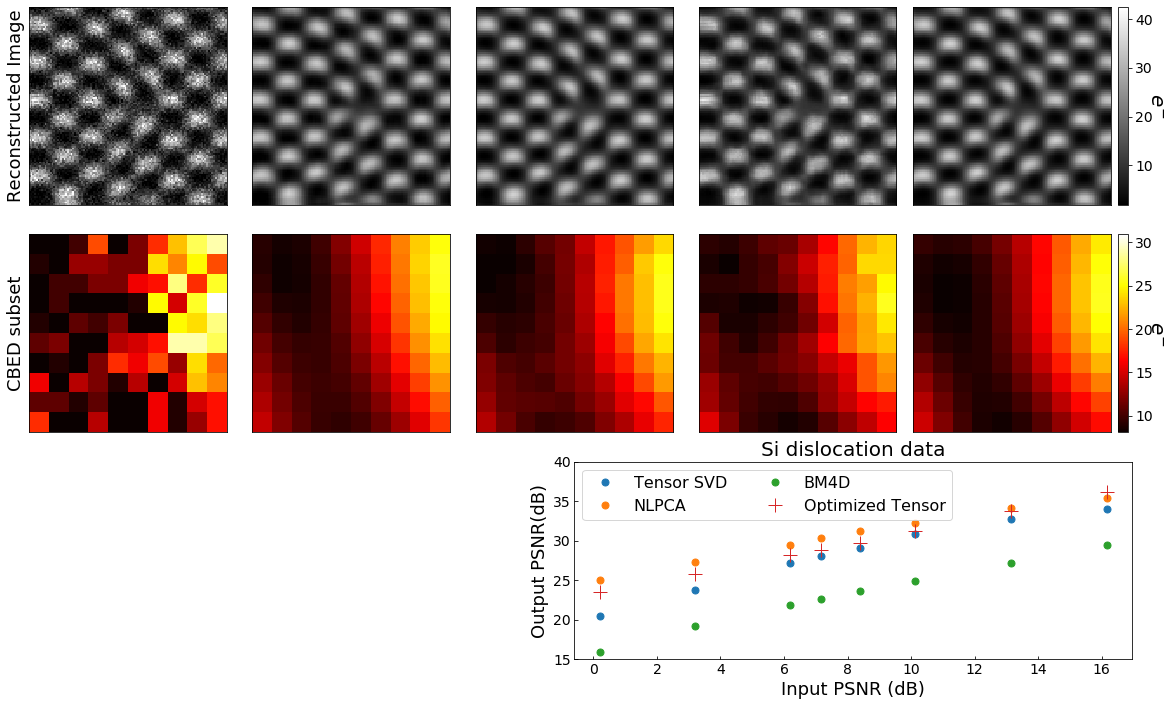

In [12]:
# overall plot
fig = plt.figure(figsize=(20,12))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(351)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.ylabel('Reconstructed Image', fontsize=18)
# ax.text(90,105,'k',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(352)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'l',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(353)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'m',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(354)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'n',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(355)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'o',fontsize=45, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(356)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=18)
# ax.text(8,8,'p',fontsize=45, color='white', fontweight='bold')

ax = fig.add_subplot(357)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'q',fontsize=45, color='white', fontweight='bold')
# ax.text(0,8,'1.0 sec',fontsize=25, color='white')

ax = fig.add_subplot(358)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'r',fontsize=45, color='white', fontweight='bold')
# ax.text(0,8,'779.9 sec',fontsize=25, color='white')

ax = fig.add_subplot(359)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'s',fontsize=45, color='white', fontweight='bold')
# ax.text(0,8,'145.3 sec',fontsize=25, color='white')

ax = fig.add_subplot(3,5,10)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'t',fontsize=45, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)

ax3 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('Si dislocation data', fontsize=20)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')
plt.ylim([15,40])

fig.subplots_adjust(wspace = 0.0, hspace = 0.15)
fig.savefig('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/SiDisl_DiffMethods.tif')

([], <a list of 0 Text yticklabel objects>)

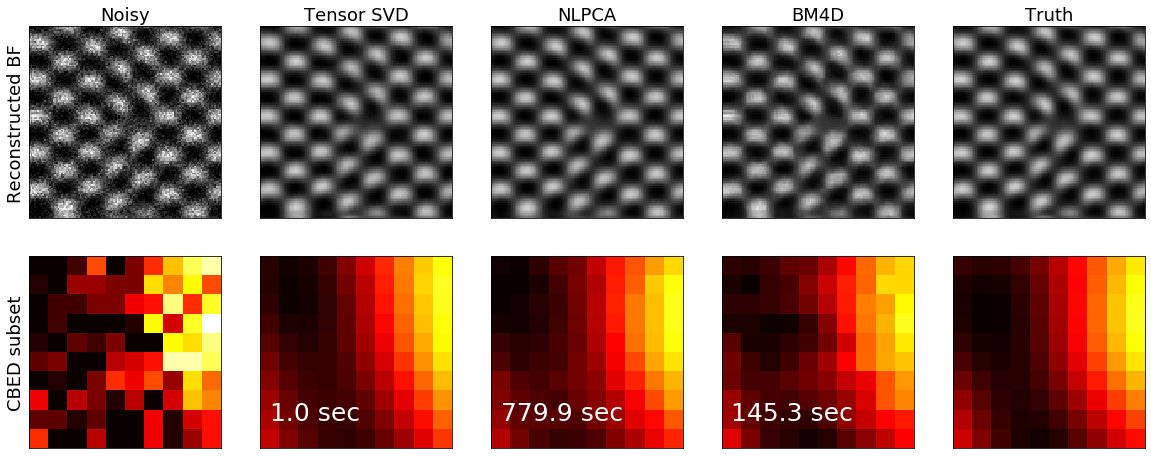

In [14]:
# overall plot
fig = plt.figure(figsize=(20,12))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(351)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.ylabel('Reconstructed BF', fontsize=18)
plt.title('Noisy',fontsize=18)
# ax.text(90,105,'k',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(352)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Tensor SVD',fontsize=18)
# ax.text(90,105,'l',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(353)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('NLPCA',fontsize=18)
# ax.text(90,105,'m',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(354)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('BM4D',fontsize=18)
# ax.text(90,105,'n',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(355)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Truth',fontsize=18)
# ax.text(90,105,'o',fontsize=45, color='white', fontweight='bold')


# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(im, cax=cax)
# cbar.ax.tick_params(labelsize=14)
# cbar.set_label('Electron Counts',rotation=270,fontsize=14, labelpad = 12)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(356)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=18)
# ax.text(8,8,'p',fontsize=45, color='white', fontweight='bold')

ax = fig.add_subplot(357)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'q',fontsize=45, color='white', fontweight='bold')
ax.text(0,8,'1.0 sec',fontsize=25, color='white')

ax = fig.add_subplot(358)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'r',fontsize=45, color='white', fontweight='bold')
ax.text(0,8,'779.9 sec',fontsize=25, color='white')

ax = fig.add_subplot(359)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'s',fontsize=45, color='white', fontweight='bold')
ax.text(0,8,'145.3 sec',fontsize=25, color='white')

ax = fig.add_subplot(3,5,10)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'t',fontsize=45, color='white', fontweight='bold')


# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(im, cax=cax)
# cbar.ax.tick_params(labelsize=14)
# cbar.set_label('Electron Counts',rotation=270,fontsize=14, labelpad = 12)

# ax3 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
# ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
# ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
# ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
# ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor')
# plt.xlabel('Input PSNR (dB)',fontsize=18)
# plt.ylabel('Output PSNR(dB)',fontsize=18)
# plt.legend(fontsize=16, loc='upper left')
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
# ax3.tick_params(direction='in',labelsize = 14)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')


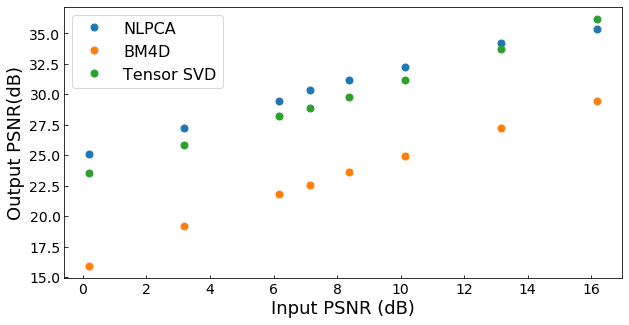

In [29]:
fig = plt.figure(figsize=(10,5))
ax3 = plt.subplot2grid((1,1), (0,0))
# ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '.', markersize=14, label = 'Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')

In [4]:
def psnr(truth, denoise):
    mse = np.mean( (truth - denoise) ** 2 )
    PIXEL_MAX = np.amax(truth)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [5]:
# transpose_option = 1 for tensor denoised data, where first dimension is for rec space and need to be transposed to match simulation
# transpose_option = 0 for noisy data, third dimension is for rec space and no need to transpose
def averagePSNR(denoised_data,truth_data,transpose_option):
    nlayer = truth_data.shape[2]
    side = np.sqrt(nlayer)
    side = int(side)
    psnr_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            if transpose_option == 1:
                denoise = np.transpose(denoised_data[:,irow,icol].reshape(side,side))
            else:
                denoise = denoised_data[irow,icol,:].reshape(side,side)
            psnr_map[irow,icol] = psnr(truth,denoise)
    return np.mean(psnr_map)